In [1]:
#importando bibliotecas
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [4]:
#carregando a base
df = pd.read_csv(r"C:\Users\jogmo\Downloads\train.csv",)

# Dicionário:
idpassageiro = Identificador único de cada passageiro.
sobreviveu = Indica se o passageiro sobreviveu (1 = sim, 0 = não).
classepassageiro = Classe do bilhete (1ª, 2ª ou 3ª classe).
nome = Nome completo do passageiro.
sexo = Sexo do passageiro (masculino ou feminino).
idade = Idade do passageiro em anos (valores decimais possíveis).
irmaos_conjuges_abordo = Quantos irmãos ou cônjuges (marido/esposa) estavam a bordo com ele.
pais_filhos_abordo = Quantos pais ou filhos estavam a bordo com ele.
bilhete	= Número do bilhete de embarque.
tarifa = Valor pago pela passagem.
cabine = Código da cabine onde o passageiro ficou (nem todos têm).
embarque = Porto onde o passageiro embarcou:

In [6]:
#renomeando as colunas de forma traduzida
df = df.rename(columns={ 
    'PassengerId': 'idpassageiro',
    'Survived': 'sobreviveu',
    'Pclass': 'classepassageiro',
    'Name': 'nome',
    'Sex': 'sexo',
    'Age': 'idade',
    'SibSp': 'irmaos_conjuges_abordo',
    'Parch': 'pais_filhos_abordo',
    'Ticket': 'bilhete',
    'Fare': 'tarifa',
    'Cabin': 'cabine',
    'Embarked': 'embarque'
})


In [9]:
#verificando a base inicialmente 
df[['idpassageiro', 'nome', 'sexo', 'idade']].head(10)

,idpassageiro,nome,sexo,idade
0,1,"Braund, Mr. Owen Harris",male,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,"Allen, Mr. William Henry",male,35.0
5,6,"Moran, Mr. James",male,NaN
6,7,"McCarthy, Mr. Timothy J",male,54.0
7,8,"Palsson, Master. Gosta Leonard",male,2.0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


In [12]:
#verificando se as variáveis são dos tipos exigidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idpassageiro            891 non-null    int64  
 1   sobreviveu              891 non-null    int64  
 2   classepassageiro        891 non-null    int64  
 3   nome                    891 non-null    object 
 4   sexo                    891 non-null    object 
 5   idade                   714 non-null    float64
 6   irmaos_conjuges_abordo  891 non-null    int64  
 7   pais_filhos_abordo      891 non-null    int64  
 8   bilhete                 891 non-null    object 
 9   tarifa                  891 non-null    float64
 10  cabine                  204 non-null    object 
 11  embarque                889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#gerando estatisticas básicas
df.describe()

,idpassageiro,sobreviveu,classepassageiro,idade,irmaos_conjuges_abordo,pais_filhos_abordo,tarifa
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


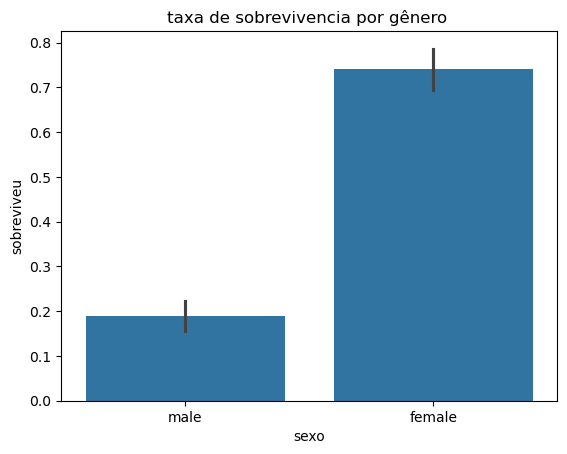

In [15]:
sns.barplot(data=df, x='sexo', y='sobreviveu')
plt.title("taxa de sobrevivencia por gênero ")
plt.show()
#gerando graficos para entender a taxa de sobrevivencia


In [17]:
#realizei um input onde preencho as cabines com valores nulos como "Desconhecida"
df['cabine'] = df['cabine'].fillna('Desconhecida')

In [18]:
#Realizei um input de uma mediana para as idades desconhecidas
df['idade'] = df['idade'].fillna(df['idade'].median())


In [19]:
#Verifiquei se continham linhas duplicadas
print("Duplicadas:", df.duplicated().sum())

Duplicadas: 0


In [20]:
print(df.isnull().sum())
#verificando se continham valores nulos em um geral

idpassageiro              0
sobreviveu                0
classepassageiro          0
nome                      0
sexo                      0
idade                     0
irmaos_conjuges_abordo    0
pais_filhos_abordo        0
bilhete                   0
tarifa                    0
cabine                    0
embarque                  2
dtype: int64


In [21]:
#confirmei os nulos na coluna embarque
df['embarque'].isnull().sum()

np.int64(2)

In [22]:
#Fiz um input de uma moda na coluna embarque
df['embarque'] = df['embarque'].fillna(df['embarque'].mode()[0])

In [24]:
 #chequei quantas mulheres e homens tinham embarcados
print(df['sexo'].value_counts())
#E a quanitidade de pessoas embarcadas por classe
print(df['classepassageiro'].value_counts())

sexo
male      577
female    314
Name: count, dtype: int64
classepassageiro
3    491
1    216
2    184
Name: count, dtype: int64


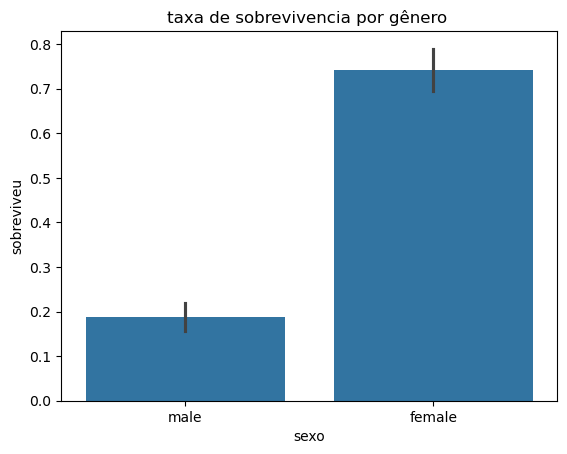

In [27]:
#gerando gráficos para entender a taxa de sobrevivencia baseada no gênero
sns.barplot(data=df, x='sexo', y='sobreviveu')
plt.title("taxa de sobrevivencia por gênero ")
plt.show()

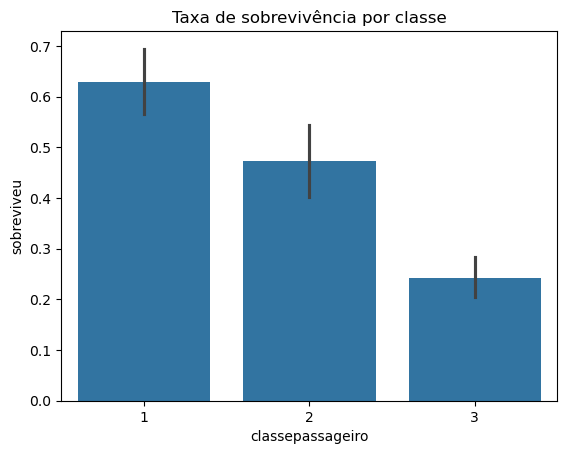

In [28]:
#gerando do mesmo modo agora para mostrar a taxa baseada por classe embarcada
sns.barplot(data=df, x='classepassageiro', y='sobreviveu')
plt.title("Taxa de sobrevivência por classe")
plt.show()

In [ ]:
sns.barplot(data=df, x='classepassageiro', y='sobreviveu')
plt.title("Taxa de sobrevivência por classe")
plt.show()